In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           random_state=42,
                           n_clusters_per_class=1,
                           class_sep=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

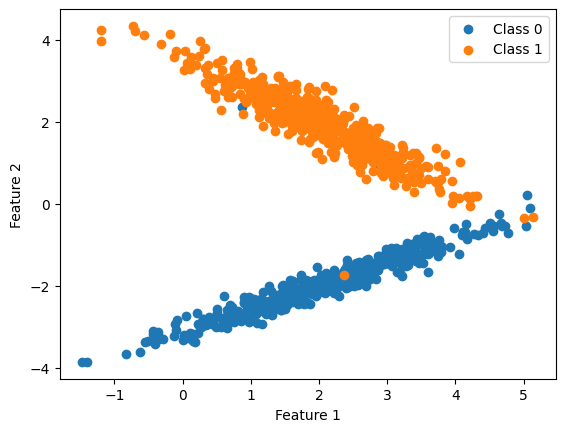

In [ ]:
for i in np.unique(y):
  plt.scatter(X[y==i,0], X[y==i,1], label=f'Class {i}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y_class'] = y
df.head()

,x1,x2,y_class
0,1.601034,2.535353,1
1,1.755945,-2.172352,0
2,2.354479,-1.948528,0
3,4.103090,-0.766515,0
4,1.753178,1.787514,1


In [ ]:
x1_mean_A = df[df['y_class'] == 1]['x1'].mean()
x1_mean_B = df[df['y_class'] == 0]['x1'].mean()

x2_mean_A = df[df['y_class'] == 1]['x2'].mean()
x2_mean_B = df[df['y_class'] == 0]['x2'].mean()

x1_std_A = df[df['y_class'] == 1]['x1'].std()
x1_std_B = df[df['y_class'] == 0]['x1'].std()

x2_std_A = df[df['y_class'] == 1]['x2'].std()
x2_std_B = df[df['y_class'] == 0]['x2'].std()

In [ ]:
print(x1_mean_A)
print(x1_std_A)

print(x2_mean_A)
print(x2_std_A)

print(x1_mean_B)
print(x1_std_B)

print(x2_mean_B)
print(x2_std_B)

2.030335015555556
0.9622591901746363
1.9420640316910518
0.8388061027957265
2.021362179247888
1.1710954866326524
-1.9596468177821709
0.7427906541969557


In [ ]:
def normal_dist(x, mean, std):
    prob_density = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    return prob_density

In [ ]:
Classes = [1, 0]
test_point = [1,-3]
class_logs = []
for class_ in Classes:
  log_like_sum=0
  for i, data in enumerate(test_point):
    for feature in ['x1', 'x2']:
      mean = df[df['y_class'] == class_][feature].mean()
      std = df[df['y_class'] == class_][feature].std()
      log_like_sum = log_like_sum + np.log(normal_dist(data, mean , std))
  print("For class {}".format(class_), log_like_sum+np.log(0.5))
  class_logs.append(log_like_sum+np.log(0.5))


For class 1 -36.16494802866238
For class 0 -22.58175347086771


In [ ]:
max_index = np.argmax(class_logs)
print(max_index)
y_pred = Classes[max_index]

1


In [ ]:
print("Test input {}, {} is predicted as Class {}".format(test_point[0],test_point[1], y_pred))

Test input 1, -3 is predicted as Class 0


In [ ]:
df_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
df_train['y_class'] = y_train

In [ ]:
def predict(test_point, df):
  Classes = [1, 0]
  class_logs = []
  for class_ in Classes:
    log_like_sum=0
    for i, data in enumerate(test_point):
      for feature in ['x1', 'x2']:
        mean = df[df['y_class'] == class_][feature].mean()
        std = df[df['y_class'] == class_][feature].std()
        log_like_sum = log_like_sum + np.log(normal_dist(data, mean , std))
    # print("For class {}".format(class_), log_like_sum+np.log(0.5))
    class_logs.append(log_like_sum+np.log(0.5))
    max_index = np.argmax(class_logs)
    y_pred = Classes[max_index]
    return y_pred


In [ ]:
y_pred = []
for i in range(len(X_test)):
    y_pred.append(predict(X_test[i], df_train))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.51


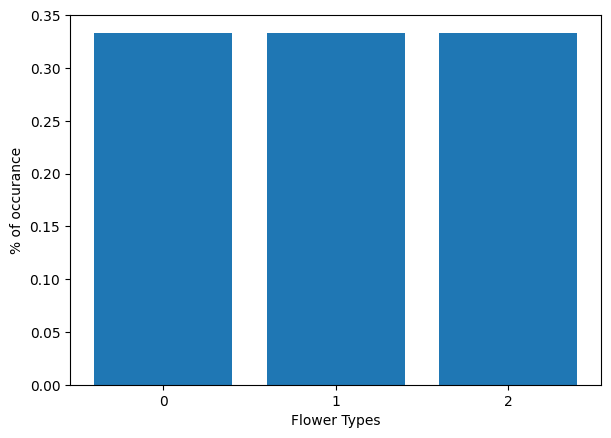

In [ ]:
# import Libraries
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd


# Load Iris dataset
iris = datasets.load_iris()

# For Simplicity let's consider only two features
X = iris.data[:, :2]
y = iris.target

N = X.shape[0]

# Do the Train and Validation Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Count the #of occurance of each flowers
c = Counter(y)
labels = np.array(list(c.keys()))
freq = np.array(list(c.values()))/N

#Plot the frequency histogram
fig1, ax = plt.subplots()
fig1.subplots_adjust(left=.16, bottom=.2, right=.99, top=.97)

plt.bar(labels, freq)
plt.xticks([0,1,2])
plt.xlabel('Flower Types')
plt.ylabel('% of occurance')
plt.show()

In [ ]:

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
# import Libraries
import numpy as np
from sklearn import datasets
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Load Iris dataset
iris = datasets.load_iris()


# For Simplicity let's consider only two features
X = iris.data[:, :2]
y = iris.target


# Do the Train and Validation Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Define out custon Naive Bayes Classifier
class myNBClassifier(object):
    """Custom Naive Bayes Classifier"""
    def __init__(self):
        self.means = []
        self.stds =  []


    def myGaussian(self, x, mu, sig):
        """Gaussian function to compute likelihood"""
        lhd = 1/(sig * np.sqrt(2 * np.pi))*np.exp(- (x - mu )**2 / (2 * sig**2) )
        return lhd

    def fit(self, data, label):
        """Train our model with training data and labels given"""
        self.c = list(Counter(y).keys())
        dataset = np.column_stack((data, label))

        for g in self.c:
            segment = dataset[dataset[:,2]==g][:,:-1]
            f1, f2 = np.hsplit(segment,2)
            self.means.append([np.round(np.mean(f1),2),np.round(np.mean(f2),2)])
            self.stds.append([np.round(np.std(f1),2),np.round(np.std(f2),2)])


    def predict(self, data):
        """Predict the class for a given set of inputs"""
        fn =data.shape[1]
        mypred = []
        for row in data:
            likelihood = []
            for l in self.c:
                mus = self.means[l]
                sigs = self.stds[l]
                lkd = 0
                for i in range(fn):
                    lkd+=np.log(self.myGaussian(row[i], mus[i], sigs[i]))
                likelihood.append(lkd+np.log(1./len(self.c)))
            mypred.append(np.argmax(likelihood))

        return np.asarray(mypred)


# Create an instance of our Classifier
myNB = myNBClassifier()

# Train with training data
myNB.fit(X_train, y_train)

# Predict class for test data
pred = myNB.predict(X_test)

# Compute the accuracy
acc = accuracy_score(y_test, pred)*100

# Print out the accuracy of our classifier
print("Accuracy of our model: {}%".format(np.round(acc, 2)))

Accuracy of our model: 80.0%
